In [9]:
from extract_erps import process_data
eeg_file_paths = [r"data/Sample1.csv"]
metadata_file_path = [r"metadata/Sample1.csv"]
output_dir_name = "outputs"
process_data(eeg_file_paths,metadata_file_path, output_dir_name=output_dir_name, onset_time = 0, after_time = 1.0, sr = 125)

  0%|          | 0/1 [00:00<?, ?it/s]

EEG timestamp: 2025-02-25 09:42:53.939152+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.192139
EEG timestamp: 2025-02-25 09:42:53.939389+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191902
EEG timestamp: 2025-02-25 09:42:53.939622+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191669
EEG timestamp: 2025-02-25 09:42:53.939850+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191441
EEG timestamp: 2025-02-25 09:42:53.940076+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.191215
EEG timestamp: 2025-02-25 09:42:53.940305+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.190986
EEG timestamp: 2025-02-25 09:42:53.940597+00:00
Trial timestamp: 2025-02-25 09:43:15.131291+00:00
Difference in seconds: 21.190694
EEG timestamp: 2025-02-25 09:42:53.941247+00:00
Trial timestamp: 2025-02-25 09:43:1

100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


In [11]:
import numpy as np 
incongruent_trial = np.load("outputs/incongruent_trials_Sample1.npy")
print(incongruent_trial.shape)

(147, 16, 125)


In [12]:
import numpy as np 
congruent_trial = np.load("outputs/congruent_trials_Sample1.npy")
print(congruent_trial.shape)

(92, 16, 125)


In [16]:
from scipy.signal import butter, filtfilt
from scipy.stats import zscore

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)  # Apply along time axis
alpha_erp = bandpass_filter(incongruent_trial * 1e-6, 0.5, 40, 125)
print(alpha_erp.shape)

(147, 16, 125)


In [17]:
from scipy.stats import zscore
normal_erp = zscore(alpha_erp,axis=-1)
mean_trial = normal_erp.mean(axis=0)
print(mean_trial.shape)

(16, 125)


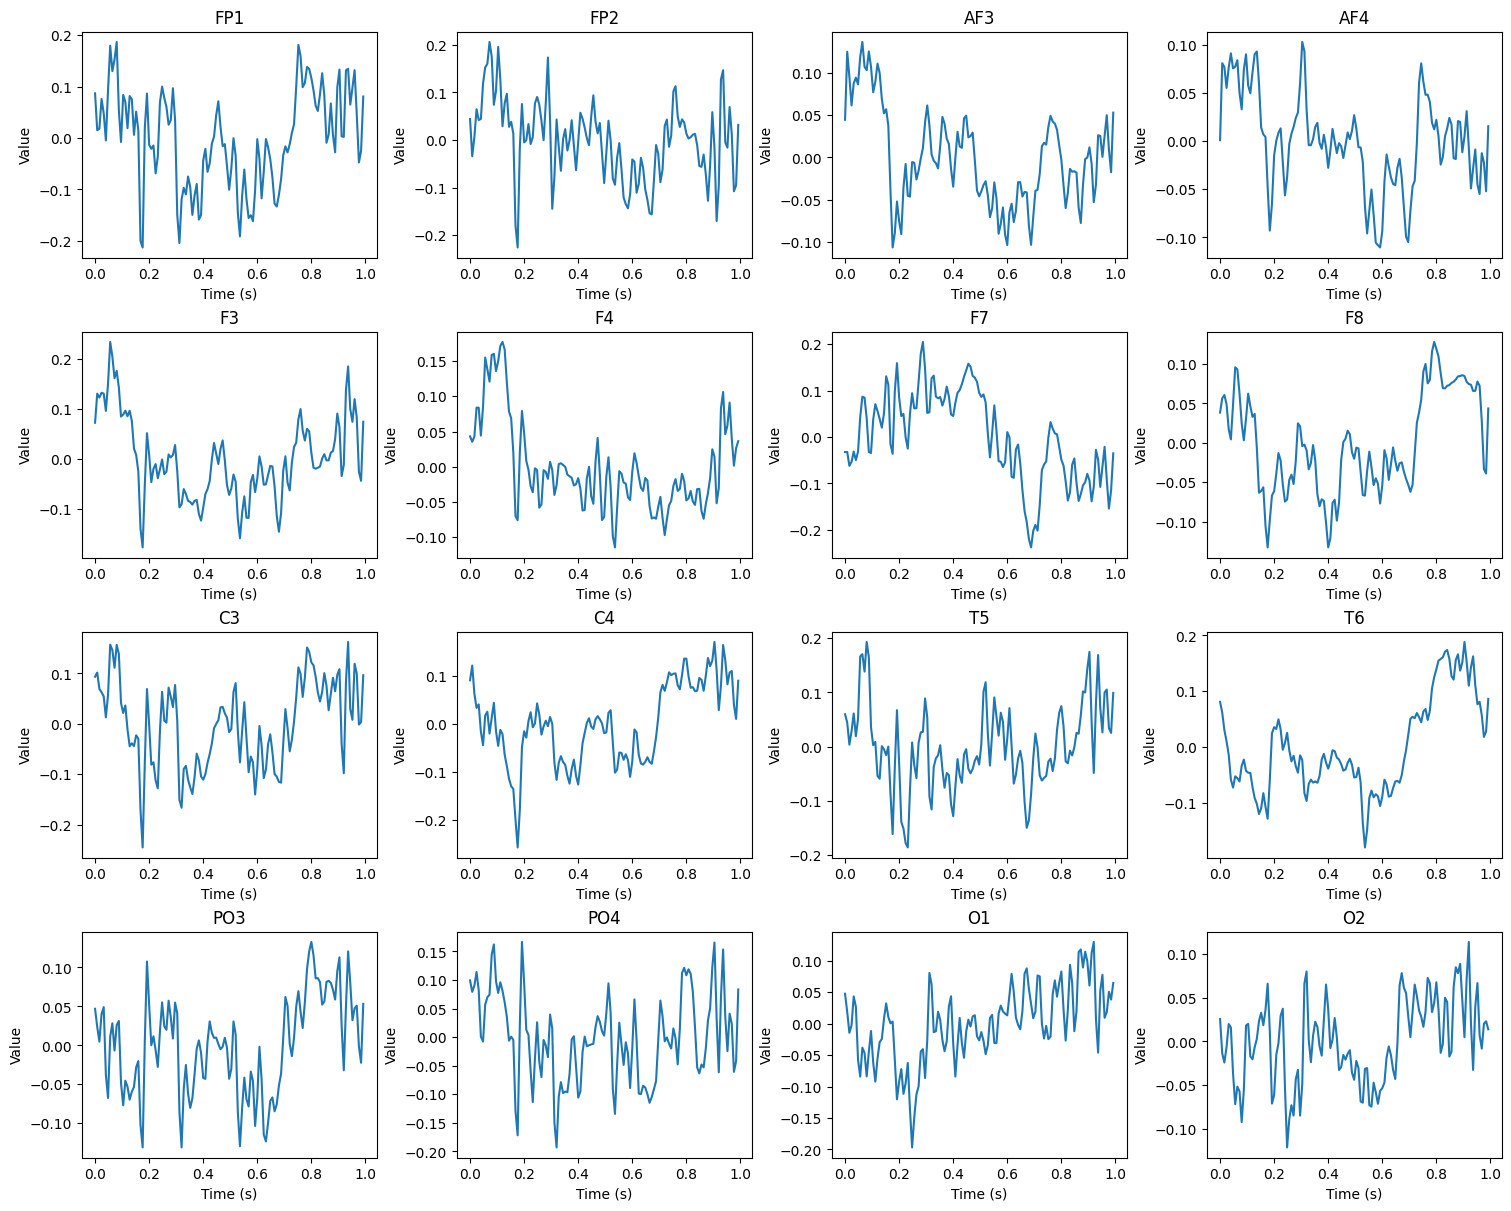

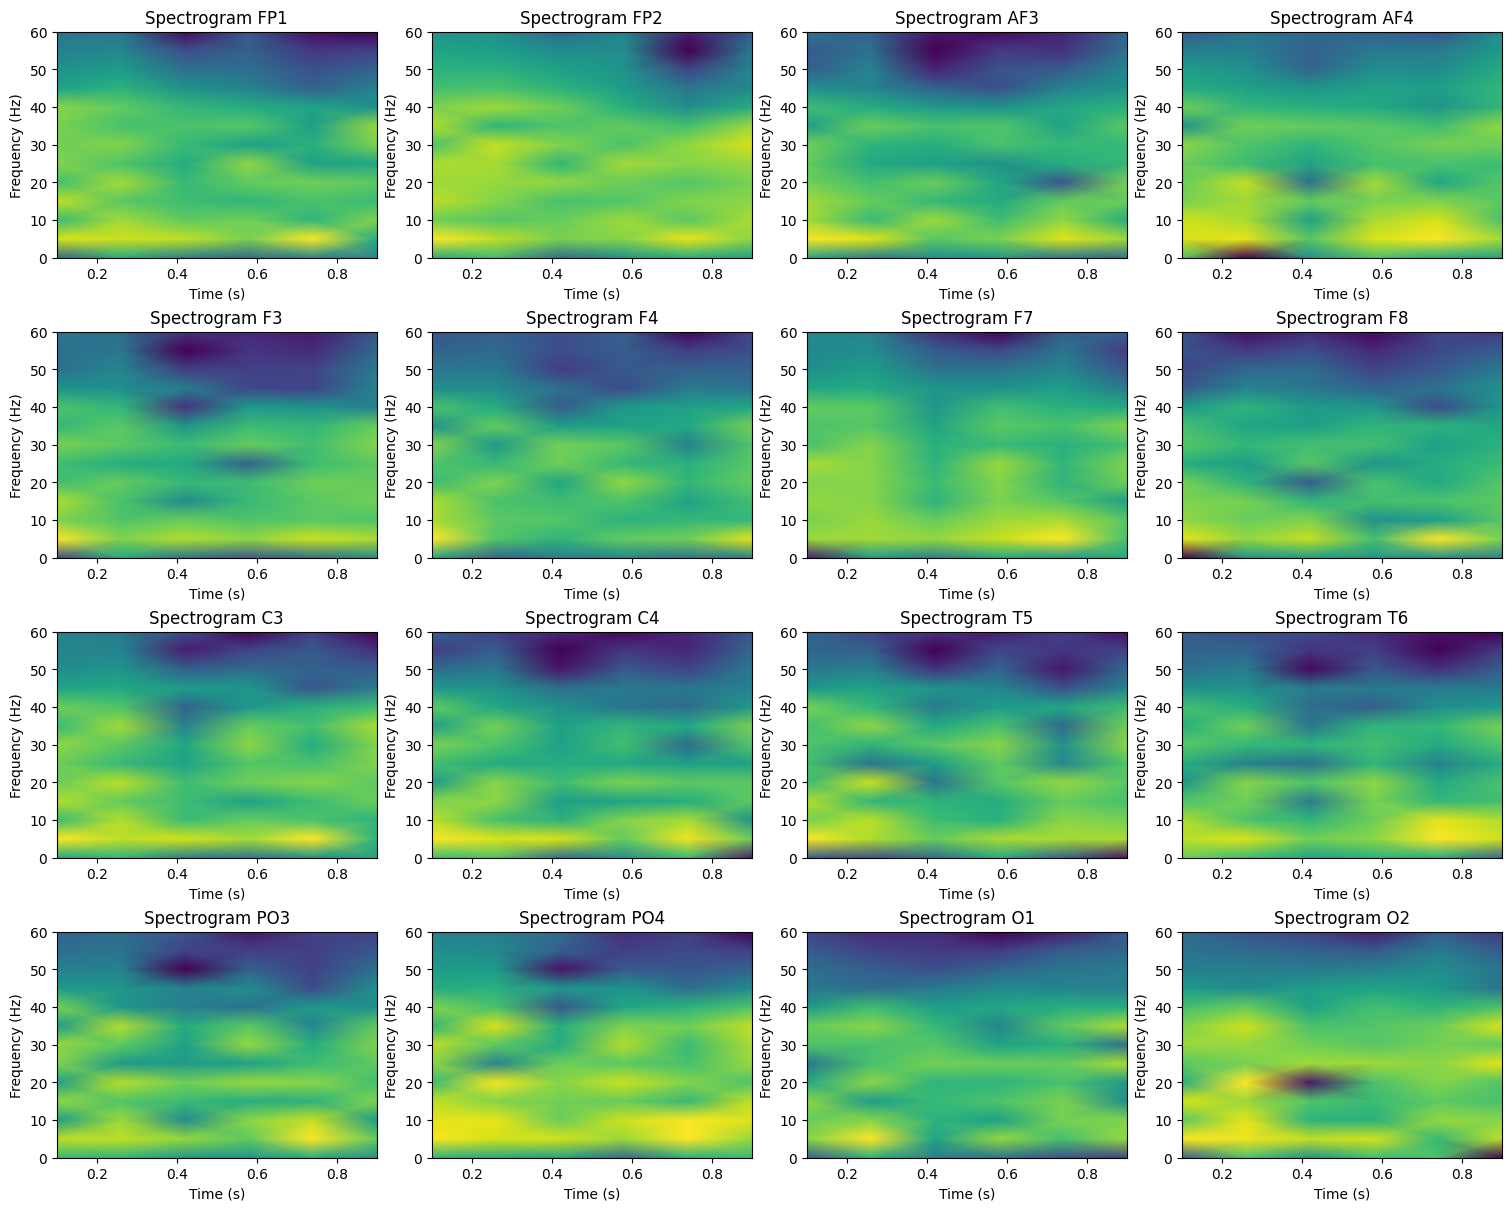

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
def plot_channels(channels, data):
  channel_list = ['FP1','FP2','AF3','AF4','F3','F4','F7','F8','C3','C4','T5','T6','PO3','PO4','O1','O2']
  time_values = np.arange(data.shape[1]) / 125
    
  num_channels = len(channels)
  cols = 4  # Number of columns in the subplot
  rows = (num_channels + cols - 1) // cols  # Compute required rows
    
  fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), constrained_layout=True)
  axes = axes.flatten()  # Flatten to simplify indexing
    
  for i, channel in enumerate(channels):
      sns.lineplot(ax=axes[i], x=time_values, y=data[channel, :])
      axes[i].set_xlabel("Time (s)")
      axes[i].set_ylabel("Value")
      axes[i].set_title(f"{channel_list[channel]}")
    
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])
  plt.savefig("plots/signal_sample1.pdf")
  plt.show()
    
    # Create spectrograms for each channel
  fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), constrained_layout=True)
  axes = axes.flatten()
    
  for i, channel in enumerate(channels):
      f, t, Sxx = spectrogram(data[channel, :], fs=125,nperseg=25, noverlap=5)
      axes[i].pcolormesh(t, f, np.log(Sxx + 1e-10), shading='gouraud')
      axes[i].set_xlabel("Time (s)")
      axes[i].set_ylabel("Frequency (Hz)")
      axes[i].set_title(f"Spectrogram {channel_list[channel]}")
    
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])
  plt.savefig("plots/spectrogram_sample1.pdf")
  plt.show()

def viz(file_path, trial_id, channels):
  data = np.load(file_path)
  data = data[trial_id]
  plot_channels(channels, data)

plot_channels([i for i in range(16)],mean_trial)